In [5]:
#!/usr/bin/env python
"""
Example usage of camera class
@author: Dorian Tsai
"""

import numpy as np
import machinevisiontoolbox as mvt
import cv2 as cv 
import matplotlib.pyplot as plt

%matplotlib inline

c = mvt.Camera()

# test basic properties/setters/getters
print(c.name)
c.name = 'machine vision toolbox'
print(c.name)

print(c.K)

print('\n')
c.printCameraAttributes()
print('\n')

print(c.t)
c.t = np.r_[1, 2, 3]
print(c.t)
print(c.T)

print(c.rpy)
c.rpy = np.r_[0.1, 0.2, 0.3]
print(c.rpy)
print(c.T.A)


principal point not specified,                    setting it to centre of image plane
mvtcamera
machine vision toolbox
[[8.1e+03 0.0e+00 2.5e+02]
 [0.0e+00 8.1e+03 2.5e+02]
 [0.0e+00 0.0e+00 1.0e+00]]


_name : 	 machine vision toolbox
_camtype : 	 perspective
_fu : 	 [0.081]
_fv : 	 [0.081]
_rhou : 	 [1.e-05]
_rhov : 	 [1.e-05]
_nu : 	 500.0
_nv : 	 500.0
_u0 : 	 250.0
_v0 : 	 250.0
_T : 	 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
_image : 	 None
_fig : 	 None
_ax : 	 None


[0. 0. 0.]
[1. 2. 3.]
   1           0           0           1            
   0           1           0           2            
   0           0           1           3            
   0           0           0           1            

[ 0. -0.  0.]
[13.12718632 15.96772612  5.84110448]
[[ 0.95642509 -0.03695701  0.28962948  0.        ]
 [ 0.0978434   0.97517033 -0.19866933  0.        ]
 [-0.27509585  0.21835066  0.93629336  0.        ]
 [ 0.          0.          0.          1.        ]]


creating new figure and axes for camera
creating new figure and axes for camera


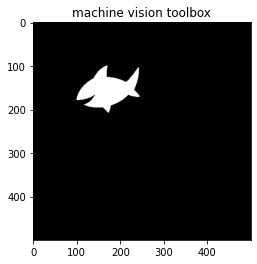

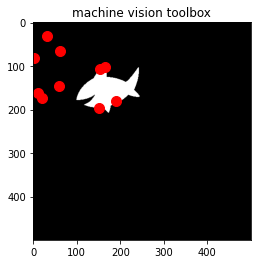

In [6]:

"""
projecting points onto an image
TODO verify
"""

npts = 10
p = np.random.randint(0, 200, (2, npts))

imfile = '../images/shark1.png'
im = mvt.iread(imfile)

c.image = im
c.plotcreate()
c.plot(p) 


In [7]:
"""
Fundamental matrix
"""

import spatialmath.base as tr
from spatialmath import SE3

# fundamental matrix
# create +8 world points (20 in this case)
nx, ny = (4, 5)
depth = 1.5
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)
Z = depth * np.ones(X.shape)
P = np.dstack((X, Y, Z))
PC = np.ravel(P, order='C')
PW = np.reshape(PC, (3, nx * ny), order='F')

# create projections from pose 1:
c.t = np.r_[0, 0, 0]
c.rpy = np.r_[0, 0, 0]
print(c.T)
p1 = c.project(PW)  # p1 wrt c's T
print(p1)

# define pose 2:
t2 = np.r_[0.1, 0, 0]
rpy2 = np.r_[0, 0, 0]

T2 = tr.transl(t2) @ SE3.RPY(rpy2).A
p2 = c.project(PW, T2)
print(p2)

# convert p1, p2 into lists of points?
p1 = np.float32(np.transpose(p1))
p2 = np.float32(np.transpose(p2))
F = c.FfromPoints(np.float32(p1), p2,
                    method=cv.FM_8POINT,
                    ransacReprojThresh=3,
                    confidence=0.99,
                    maxiters=10)
# TODO F not working yet/bad values going in

   1           0           0           0            
   0           1           0           0            
   0           0           1           0            
   0           0           0           1            

[[ 250. 2050. 3850. 5650.  250. 2050. 3850. 5650.  250. 2050. 3850. 5650.
   250. 2050. 3850. 5650.  250. 2050. 3850. 5650.]
 [ 250.  250.  250.  250. 1600. 1600. 1600. 1600. 2950. 2950. 2950. 2950.
  4300. 4300. 4300. 4300. 5650. 5650. 5650. 5650.]]
[[-290. 1510. 3310. 5110. -290. 1510. 3310. 5110. -290. 1510. 3310. 5110.
  -290. 1510. 3310. 5110. -290. 1510. 3310. 5110.]
 [ 250.  250.  250.  250. 1600. 1600. 1600. 1600. 2950. 2950. 2950. 2950.
  4300. 4300. 4300. 4300. 5650. 5650. 5650. 5650.]]
Fund mat =  None


creating new figure and axes for camera


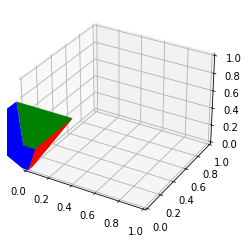

In [8]:

# plot_camera?
fig, ax = c.plot_camera(frustum=True)
plt.show()
